In [2]:
from tqdm import tqdm
import pandas as pd
import os
from datetime import datetime

import wandb
# wandb.login(relogin=True)
api = wandb.Api()

# Scrape metrics and make one big df

In [3]:
base_path = "dri-ice"
# project_names = ["Composable_Interventions", "AK_Tests"]
project_names = ["Composable_Interventions",]
project_names = [os.path.join(base_path, x) for x in project_names]

all_runs_frame = None
for project_name in project_names:
    runs = api.runs(project_name)
    for run in tqdm(runs, desc=f"Loading runs for project: {project_name}"):
        
        # only keep finished runs
        if run.state != "finished":
            continue
        
        # skip hparam searches
        skip_tags = ["test", "hparam_search"]
        should_skip = False
        for tag in skip_tags:
            if tag in run.config["tag"].lower():
                should_skip = True
        
        if should_skip:
            continue

        try:
            run_start_datetime = datetime.fromtimestamp(run.summary_metrics["_timestamp"])
            start_cutoff = datetime.strptime("2024-05-14 12:00:00", "%Y-%m-%d %H:%M:%S")
            
            # only keep runs after a certain date
            if run_start_datetime < start_cutoff:
                continue

            config_frame = pd.DataFrame([run.config])
            summary_frame = pd.DataFrame([run.summary_metrics])
            combined_frame = pd.concat([config_frame, summary_frame], axis=1)
            if all_runs_frame is None:
                all_runs_frame = combined_frame
            else:
                all_runs_frame = pd.concat([all_runs_frame, combined_frame])
        except:
            print(f"Failed to load run {run.id}")
            continue

    all_runs_frame = all_runs_frame.sort_values("_timestamp", ascending=False)
    for column in all_runs_frame.columns:
        all_runs_frame[column] = all_runs_frame[column].apply(lambda x: str(x) if isinstance(x, dict) or isinstance(x, list) else x)

all_runs_frame

Loading runs for project: dri-ice/Composable_Interventions:  69%|██████▉   | 88/128 [00:00<00:00, 169.05it/s]

Failed to load run n0iel6ok
Failed to load run xr5mede5
Failed to load run 27f8pxs0


Loading runs for project: dri-ice/Composable_Interventions: 100%|██████████| 128/128 [00:00<00:00, 150.53it/s]


,lr,tag,edit,save,seed,dtype,wandb,wbits,device,method,...,rmu_steering_coeffs,wandb_entity,wandb_project,rank,lora_type,lora_alpha,lora_dropout,target_modules,prune_method,sparsity_type
0,NaN,memit_Edit,memit,out/,42,torch.bfloat16,online,16,0,none,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.00005,ft_Edit,ft,out/,42,torch.bfloat16,online,16,0,none,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,None,none,out/,42,torch.bfloat16,online,16,0,none,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,gptq4bit-rmu,none,out/,0,torch.float16,online,4,0,quant,...,"[20, 20]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,gptq2bit-rmu,none,out/,0,torch.float16,online,2,0,quant,...,"[20, 20]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,NaN,Compress_AWQ2bit,none,out/,0,torch.float16,online,2,0,quant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,Compress_AWQ8bit,none,out/,0,torch.float16,online,8,0,quant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,Compress_AWQ4bit,none,out/,0,torch.float16,online,4,0,quant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,Compress_AWQ2bit,none,out/,0,torch.float16,online,2,0,quant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(all_runs_frame['interventions'].unique())
# run to see all cols clearly
cols = list(all_runs_frame.columns)
print("number of cols = {}".format(len(cols)))
for c in cols:
    print(c)

["['edit']" '[]' "['compress', 'unlearn']" "['unlearn', 'compress']"
 "['edit', 'unlearn']" "['unlearn', 'edit']" "['unlearn']"
 "['compress', 'edit']" "['edit', 'compress']" "['compress']"]
number of cols = 117
lr
tag
edit
save
seed
dtype
wandb
wbits
device
method
dataset
unlearn
alg_name
compress
edit_set
ckpt_path
load_ckpt
num_steps
save_ckpt
stats_dir
batch_size
max_length
model_name
save_model
compression
ln_f_module
edit_dataset
weight_decay
interventions
eval_zero_shot
lm_head_module
mlp_module_tmp
model_parallel
sparsity_ratio
attn_module_tmp
norm_constraint
number_of_edits
layer_module_tmp
rewrite_module_tmp
compression_dataset
rmu_max_num_batches
objective_optimization
qa_question_count_limit
PPL
mmlu
Rewrite accuracy
Latency
Generalization
_runtime
_timestamp
mmlu accuracy
PPl edits unmasked
wmdp_bio
wmdp_cyber
Locality
Local recall
FLOPs
PPl QA
_wandb
wmdp_cyber stderr
wmdp_cyber accuracy
mmlu stderr
Average bits
Success recall
_step
Metrics
PPL edits
Generalization recall

# Clean df to only keep the required columns

In [5]:
cols_to_keep = ["model_name", "interventions", "edit", "edit_dataset", "compression", "compression_dataset", "unlearn", "unlearn_method", "wbits", "sparsity_ratio", "PPl edits unmasked", "PPl QA", "Rewrite accuracy", "Generalization", "wmdp_bio accuracy", "wmdp_bio stderr", "wmdp_cyber accuracy", "wmdp_cyber stderr", "mmlu", "mmlu stderr"]
metrics = all_runs_frame[cols_to_keep]

rename_dict = {
    "meta-llama/Meta-Llama-3-8B" : "Llama-3 (8b)",
    "ft" : "Fine-tune",
    "memit" : "MEMIT",
    "lora" : "Lora",
    "wanda" : "Wanda",
    "sparsegpt" : "SparseGPT",
    "gptq" : "GPTQ",
    "awq" : "AWQ",
    "rmu" : "RMU",
               }
metrics["model_name"] = metrics["model_name"].apply(lambda x : rename_dict.get(x, None))
metrics["edit"] = metrics["edit"].apply(lambda x : rename_dict.get(x, None))
metrics["compression"] = metrics["compression"].apply(lambda x : rename_dict.get(x, None))
metrics["unlearn"] = metrics["unlearn"].apply(lambda x : rename_dict.get(x, None))

metrics

/tmp/ipykernel_885636/3558571656.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics["model_name"] = metrics["model_name"].apply(lambda x : rename_dict.get(x, None))
/tmp/ipykernel_885636/3558571656.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics["edit"] = metrics["edit"].apply(lambda x : rename_dict.get(x, None))
/tmp/ipykernel_885636/3558571656.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

,model_name,interventions,edit,edit_dataset,compression,compression_dataset,unlearn,unlearn_method,wbits,sparsity_ratio,PPl edits unmasked,PPl QA,Rewrite accuracy,Generalization,wmdp_bio accuracy,wmdp_bio stderr,wmdp_cyber accuracy,wmdp_cyber stderr,mmlu,mmlu stderr
0,Llama-3 (8b),['edit'],MEMIT,zsre,None,c4,None,NaN,16,0.0,4.479788e+02,3.797390e+02,0.947000,0.927000,0.695994,0.012897,0.437846,0.011133,0.612947,0.003843
0,Llama-3 (8b),['edit'],Fine-tune,zsre,None,c4,None,NaN,16,0.0,5.448611e+02,4.691998e+02,1.000000,0.854857,0.690495,0.012962,0.438853,0.011135,0.613801,0.003837
0,Llama-3 (8b),[],None,zsre,None,c4,None,NaN,16,0.0,4.430917e+02,4.001561e+02,0.016667,0.010000,0.714061,0.012670,0.442375,0.011145,0.620709,0.003815
0,Llama-3 (8b),"['compress', 'unlearn']",None,zsre,GPTQ,c4,RMU,rmu,4,0.0,5.076988e+02,4.721544e+02,0.000000,0.000000,0.647290,0.013397,0.420735,0.011078,0.588663,0.003899
0,Llama-3 (8b),"['compress', 'unlearn']",None,zsre,GPTQ,c4,RMU,rmu,2,0.0,1.500676e+05,1.580793e+05,0.002857,0.006667,0.247447,0.012099,0.253649,0.009763,0.229882,0.003544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Llama-3 (8b),['compress'],None,zsre,AWQ,c4,None,NaN,2,0.0,1.020036e+06,1.118428e+06,0.000000,0.000000,0.240377,0.011981,0.245596,0.009659,0.268908,0.003702
0,Llama-3 (8b),['compress'],None,zsre,AWQ,c4,None,NaN,8,0.0,4.443523e+02,4.007795e+02,0.006667,0.010000,0.713276,0.012680,0.444389,0.011150,0.621421,0.003811
0,Llama-3 (8b),['compress'],None,zsre,AWQ,c4,None,NaN,4,0.0,4.668763e+02,4.180739e+02,0.012821,0.000000,0.687353,0.012998,0.455964,0.011176,0.597636,0.003859
0,Llama-3 (8b),['compress'],None,zsre,AWQ,c4,None,NaN,2,0.0,1.020036e+06,1.118428e+06,0.000000,0.000000,0.240377,0.011981,0.245596,0.009659,0.268908,0.003702


In [6]:
all_runs_frame["interventions"].unique()

array(["['edit']", '[]', "['compress', 'unlearn']",
       "['unlearn', 'compress']", "['edit', 'unlearn']",
       "['unlearn', 'edit']", "['unlearn']", "['compress', 'edit']",
       "['edit', 'compress']", "['compress']"], dtype=object)

# Plot

## editing success vs bits

     model_name         interventions   edit edit_dataset compression  \
0  Llama-3 (8b)  ['edit', 'compress']  MEMIT         zsre        GPTQ   
0  Llama-3 (8b)  ['edit', 'compress']  MEMIT         zsre        GPTQ   
0  Llama-3 (8b)  ['edit', 'compress']  MEMIT         zsre        GPTQ   

  compression_dataset unlearn unlearn_method  wbits  sparsity_ratio  \
0                  c4    None            NaN      8             0.0   
0                  c4    None            NaN      2             0.0   
0                  c4    None            NaN      4             0.0   

   PPl edits unmasked        PPl QA  Rewrite accuracy  Generalization  \
0          488.535645    376.781525          0.985000        0.970000   
0        28842.179688  29891.296875          0.019238        0.000000   
0          500.020294    453.298096          0.928476        0.885429   

   wmdp_bio accuracy  wmdp_bio stderr  wmdp_cyber accuracy  wmdp_cyber stderr  \
0           0.705420         0.012782           

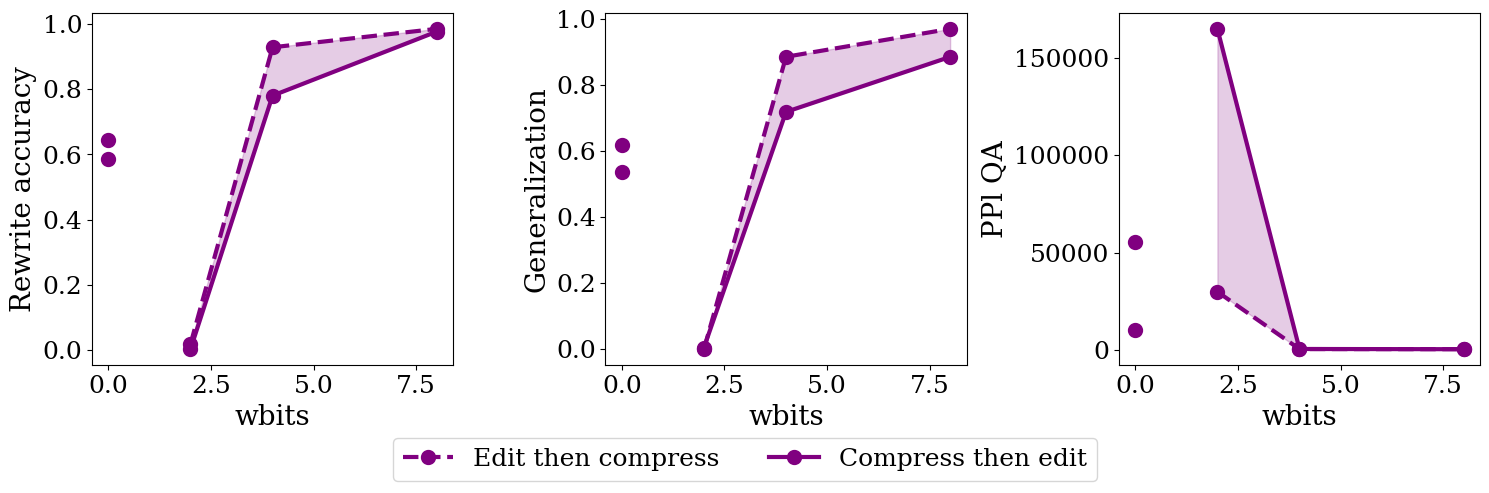

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the font family to serif
plt.rcParams['font.family'] = 'serif'

# Assuming 'metrics' DataFrame is already loaded from the CSV

# Define the criteria for filtering
included_models = ['Llama-3 (8b)']
selected_methods = ['GPTQ']
edit_method = ["MEMIT"]

# Filter based on the criteria
edit_then_compress = metrics[(metrics["interventions"] == "['edit', 'compress']") &
                             (metrics["model_name"].isin(included_models)) &
                             (metrics["compression"].isin(selected_methods)) &
                             (metrics["edit"].isin(edit_method))]
print(edit_then_compress)
compress_then_edit = metrics[(metrics["interventions"] == "['compress', 'edit']") &
                             (metrics["model_name"].isin(included_models)) &
                             (metrics["compression"].isin(selected_methods)) &
                             (metrics["edit"].isin(edit_method))]

# Sort by 'wbits' in ascending order
edit_then_compress = edit_then_compress.sort_values(by='wbits')
compress_then_edit = compress_then_edit.sort_values(by='wbits')

# Define the metrics to plot
metrics_to_plot = ['Rewrite accuracy', 'Generalization', 'PPl QA']
x_axis_metric = 'wbits'

# Compute baselines
edit_then_compress_baselines = {model: edit_then_compress[(edit_then_compress['model_name'] == model) & (edit_then_compress['sparsity_ratio'] == 0)][metrics_to_plot].mean() for model in included_models}
compress_then_edit_baselines = {model: compress_then_edit[(compress_then_edit['model_name'] == model) & (compress_then_edit['sparsity_ratio'] == 0)][metrics_to_plot].mean() for model in included_models}
# edit_then_compress_baselines = {model: edit_then_compress[(edit_then_compress['model_name'] == model) & (edit_then_compress['edit'] == 'none')][metrics_to_plot].mean() for model in included_models}

# Define plot parameters
title_fontsize = 20
label_fontsize = 20
legend_fontsize = 18
tick_fontsize = 18
line_width = 3
marker_size = 8

# Create subplots
fig, axes = plt.subplots(1, len(metrics_to_plot), figsize=(15, 5))

# Iterate over each metric and plot
for i, metric in enumerate(metrics_to_plot):
    ax = axes[i]
    
    # Plot the data with scatter and lines
    ax.plot(edit_then_compress['wbits'], edit_then_compress[metric], linestyle='--', marker='o', markerfacecolor='purple', color='purple', label='Edit then compress',
            linewidth=line_width, markersize=marker_size, markeredgewidth=line_width)
    ax.plot(compress_then_edit['wbits'], compress_then_edit[metric], linestyle='-', marker='o', markerfacecolor='purple', color='purple', label='Compress then edit',
            linewidth=line_width, markersize=marker_size, markeredgewidth=line_width)
    
    # Fill the area between the lines
    ax.fill_between(edit_then_compress['wbits'], edit_then_compress[metric], compress_then_edit[metric], color='purple', alpha=0.2)
    
    # Integrate baselines into the scatter plots
    for model in included_models:
        baseline_edit = edit_then_compress_baselines[model][metric]
        baseline_compress = compress_then_edit_baselines[model][metric]
        
        if x_axis_metric == 'Average bits':
            baseline_x = 16
            ax.set_xlim(2, 16)
        elif x_axis_metric == 'sparsity_ratio':
            baseline_x = 0.0
            ax.set_xlim(0, 1)
        else:
            baseline_x = 0  # Adjust based on your default x-axis range

        # Add baselines to the scatter plots
        ax.scatter([baseline_x], [baseline_edit], color='purple', marker='o', s=marker_size**2, edgecolor='purple', linewidth=line_width)
        ax.scatter([baseline_x], [baseline_compress], color='purple', marker='o', s=marker_size**2, edgecolor='purple', linewidth=line_width)

    ax.set_xlabel(x_axis_metric, fontsize=label_fontsize)
    ax.set_ylabel(metric, fontsize=label_fontsize)
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)

# Move the legend to the bottom of the figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', fontsize=legend_fontsize, ncol=2)

plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust the bottom margin to make space for the legend
plt.show()


In [82]:
print(metrics['edit'].unique())
baseline = metrics
print(metrics["interventions"].unique())
{model: baseline[(baseline['model_name'] == model) & (baseline['interventions'] == "['edit']")][metrics_to_plot].mean() for model in included_models}

[None 'Lora' 'MEMIT' 'Fine-tune']
["['compress', 'unlearn']" "['unlearn', 'compress']" "['edit', 'unlearn']"
 "['unlearn', 'edit']" "['unlearn']" "['compress', 'edit']"
 "['edit', 'compress']" "['compress']"]


{'Llama-3 (8b)': Rewrite accuracy   NaN
 Generalization     NaN
 PPl QA             NaN
 dtype: float64}